# 1.  Importing Libraries

In [1]:
pip install fastai

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade fastai


Note: you may need to restart the kernel to use updated packages.


In [3]:
from fastai.imports import *


In [4]:
PATH = "data"

In [5]:
!dir {PATH}
#or use import os
#files = os.listdir(PATH)
#print(files)

 Volume in drive C has no label.
 Volume Serial Number is F0BD-FA7A

 Directory of c:\Users\ASUS\Desktop\DL\data

14.01.2024  23:00    <DIR>          .
17.01.2024  14:20    <DIR>          ..
14.01.2024  20:02    <DIR>          happy
14.01.2024  23:28    <DIR>          sad
               0 File(s)              0 bytes
               4 Dir(s)  271.984.984.064 bytes free


In [6]:
# Show what is in the validation folder
!dir /b {PATH}

happy
sad


Show what is inside the validation, happy folder. This is standard way to share or provide image classification files!(On Microsoft Codes are as below.)

In [7]:
import os

PATH2 = "data\\happy"
files = os.popen(f'dir /b {PATH2}').readlines()[:5]
print(files)



['05-12-21-happy-people.jpg\n', '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg\n', '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg\n', '1677600016797.jpeg\n', '170404-happy-workers-feature.jpg\n']


In [8]:
pip install Pillow


Note: you may need to restart the kernel to use updated packages.


# 2. An Example: show first happy image in the happy folder

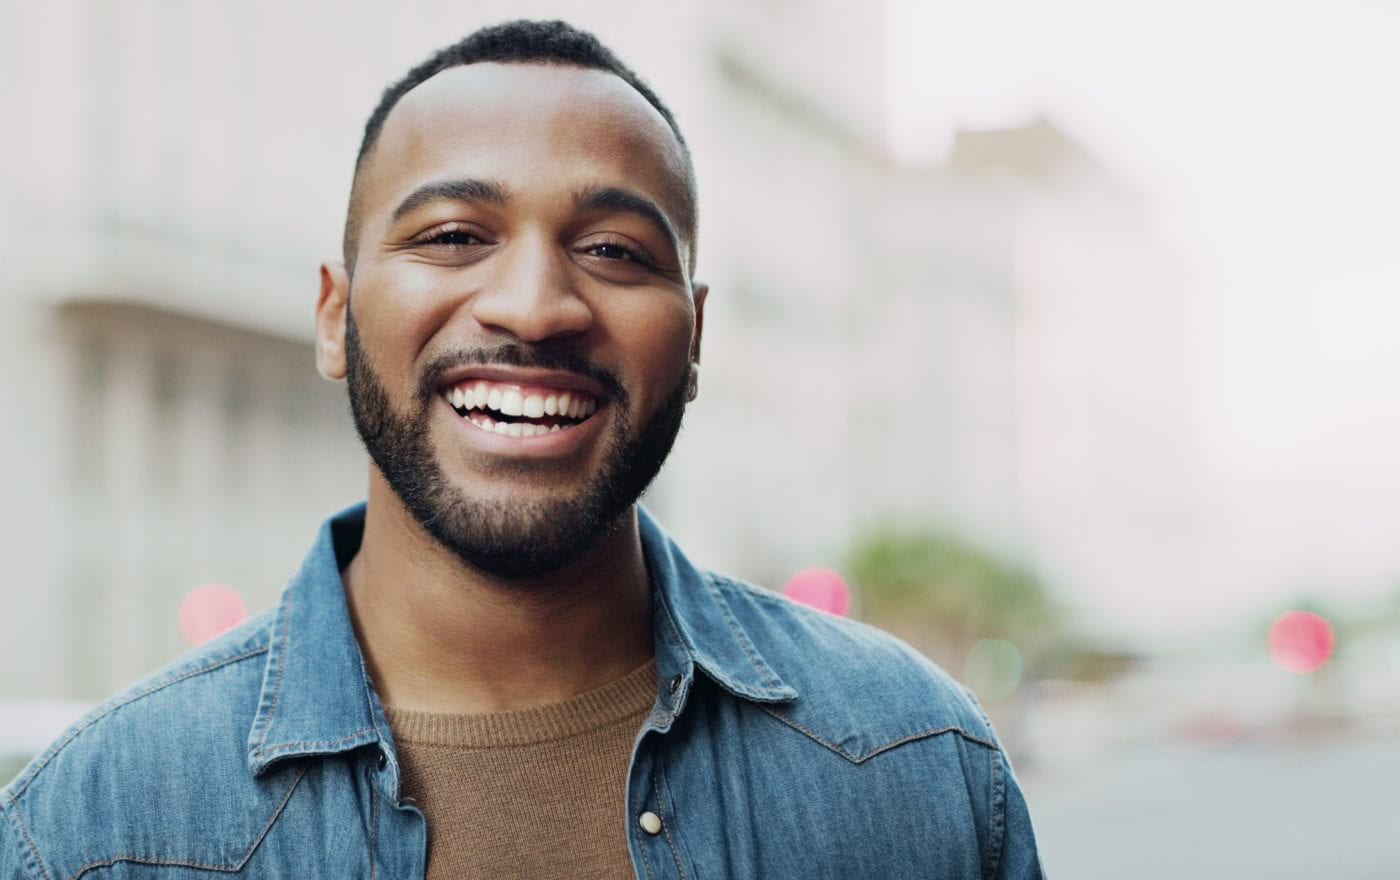

In [9]:
from IPython.display import display, Image
import os

PATH = "data\\happy"

# Dizin içindeki tüm dosyaları listele
file_list = os.listdir(PATH)

# Sadece resim dosyalarını filtrele (örneğin, .jpg, .png)
image_files = [file for file in file_list if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Eğer resim dosyaları varsa, ilk resmi göster
if image_files:
    first_image_path = os.path.join(PATH, image_files[0])
    display(Image(filename=first_image_path))
else:
    print("No image files found in the directory.")


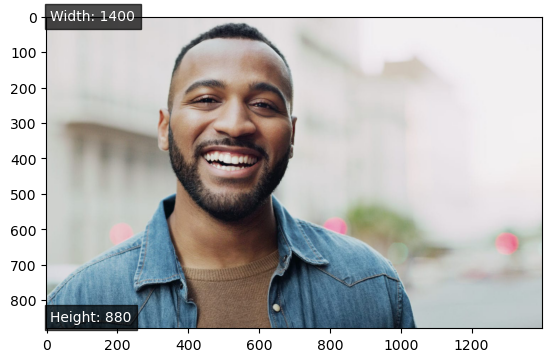

In [10]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

PATH = "data\\happy"

# Dizin içindeki tüm dosyaları listele
file_list = os.listdir(PATH)

# Sadece resim dosyalarını filtrele (örneğin, .jpg, .png)
image_files = [file for file in file_list if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Eğer resim dosyaları varsa, ilk resmi göster ve matrisini yazdır
if image_files:
    first_image_path = os.path.join(PATH, image_files[0])
    
    # Resmi aç
    img = Image.open(first_image_path)
    
    # Resmin boyutlarını al
    width, height = img.size
    
    # Resmin eksenlerle birlikte gösterimi
    plt.imshow(img)
    
    # Genişlik ve yükseklik değerlerini eksenlere yazdır
    plt.text(10, 10, f"Width: {width}", color='white', fontsize=10, bbox=dict(facecolor='black', alpha=0.7))
    plt.text(10, height - 20, f"Height: {height}", color='white', fontsize=10, bbox=dict(facecolor='black', alpha=0.7))
    
    # Eksenleri gösterme
    plt.axis('on')
    
    # Resmi ekranda göster
    plt.show()
else:
    print("No image files found in the directory.")


In [11]:
from PIL import Image
import os

PATH = "data\\happy"

# Dizin içindeki tüm dosyaları listele
file_list = os.listdir(PATH)

# Sadece resim dosyalarını filtrele (örneğin, .jpg, .png)
image_files = [file for file in file_list if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Eğer resim dosyaları varsa, ilk resmi göster ve matrisini yazdır
if image_files:
    first_image_path = os.path.join(PATH, image_files[0])
    
    # Resmi aç ve numpy dizisine dönüştür
    img = Image.open(first_image_path)
    img_array = np.array(img)
    
    # Resmin boyutları (genişlik x yükseklik x renk kanalları)
    shape = img_array.shape
    print(f"Image Shape: {shape}")
    
    # Eğer resmin üç renk kanalı varsa, bu bilgiyi ekrana yazdır
    if len(shape) == 3:
        print(f"Number of Color Channels: {shape[2]}")
else:
    print("No image files found in the directory.")


Image Shape: (880, 1400, 3)
Number of Color Channels: 3


In [12]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


## Modelling Version 1

c:\Users\ASUS\anaconda3\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
c:\Users\ASUS\anaconda3\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,1.203741,1.875015,0.580000,00:32


epoch,train_loss,valid_loss,accuracy,time
0,0.569669,0.966031,0.660000,00:39
1,0.507201,0.608153,0.780000,00:39
2,0.396414,0.218558,0.880000,00:39
3,0.308024,0.130290,0.940000,00:39
4,0.260528,0.104095,0.960000,00:39


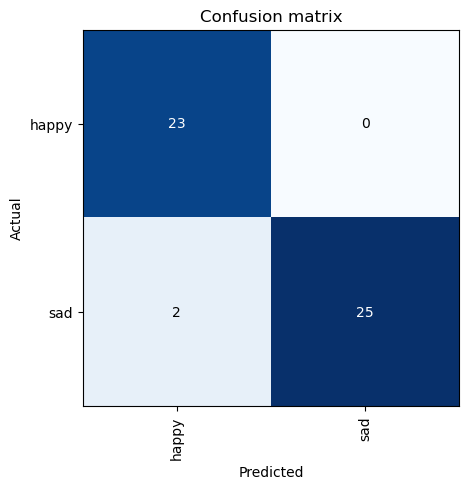

In [13]:
from torchvision.models import resnet34
from fastai.vision.all import DataBlock, ImageBlock, CategoryBlock, Resize, aug_transforms, get_image_files, RandomSplitter, parent_label, cnn_learner, resnet34, accuracy
from fastai.vision.all import ClassificationInterpretation

PATH = "data"
sz = 224  # İstediğiniz boyutu ayarlayabilirsiniz

# Dönüşümleri tanımla
tfms = aug_transforms(mult=0.5, max_lighting=0.1)
  # Örnek: max_lighting parametresi düşürüldü

# Veri bloğunu oluştur
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_y=parent_label,
                   item_tfms=Resize(sz),
                   batch_tfms=tfms)

# Veri yükleyicilerini oluştur
data = dblock.dataloaders(PATH, bs=64)

# Modeli seç ve öğrenici (learner) oluştur
arch = resnet34
learn = cnn_learner(data, arch, metrics=accuracy)

# Öğreniciyi eğit
learn.fine_tune(5)

# Test verilerine uygula
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [22]:
print(data.valid_ds)


(#50) [(PILImage mode=RGB size=721x481, TensorCategory(0)),(PILImage mode=RGB size=1920x1080, TensorCategory(0)),(PILImage mode=RGB size=284x177, TensorCategory(0)),(PILImage mode=RGB size=512x512, TensorCategory(1)),(PILImage mode=RGB size=275x183, TensorCategory(1)),(PILImage mode=RGB size=1680x1050, TensorCategory(0)),(PILImage mode=RGB size=276x183, TensorCategory(0)),(PILImage mode=RGB size=720x432, TensorCategory(1)),(PILImage mode=RGB size=318x159, TensorCategory(0)),(PILImage mode=RGB size=480x360, TensorCategory(0))...]


In [25]:
# Eğitim seti etiketlerine erişim
train_labels = data.train_ds.items

# Doğrulama seti etiketlerine erişim
valid_labels = data.valid_ds.items

print("Eğitim Seti Etiketleri:", train_labels)
print("Doğrulama Seti Etiketleri:", valid_labels)


Eğitim Seti Etiketleri: [Path('data/happy/1920px-face-smile.svg_.png'), Path('data/sad/portrait-sad-man-600nw-126009806.jpg'), Path('data/sad/image11.jpeg'), Path('data/happy/35438_hd.jpg'), Path('data/sad/kadin-siyah-swt-on_257d58d8-7a12-4e54-ad32-79060965e0c9.png'), Path('data/sad/image2.jpeg'), Path('data/happy/images18.jpg'), Path('data/happy/1zgJ8mDXVYwNY_5KkZr9Wzw.jpeg'), Path('data/happy/220px-Happy_People_A_Year_in_the_Taiga_poster.jpg'), Path('data/happy/image18.jpeg'), Path('data/sad/image5.jpeg'), Path('data/happy/images.jpg'), Path('data/happy/1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg'), Path('data/happy/360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg'), Path('data/sad/jack-lucas-smith-Zxq0dvmRyIo-unsplash-1024x701.jpg'), Path('data/sad/images8.jpg'), Path('data/sad/images15.jpg'), Path('data/happy/very-happy-people.jpg'), Path('data/sad/317lUiLn1aL._AC_UF8941000_QL80_.jpg'), Path('data/sad/X2ltYWdlcy93ZWJzaXRlX2NvbnRlbnQvbHIvMzk3LW1ja2luc2V5LTIxYTI0MjUtaml

In [29]:
# Sınıflara erişim : Etiketlerinize data.vocab üzerinden ulaşabilirsiniz. data.vocab bir CategoryMap nesnesidir ve etiket sınıflarını içerir. 
classes = data.vocab
print(classes)


['happy', 'sad']


In [42]:
log_preds, _ = learn.get_preds(dl=data.valid)
log_preds.shape


torch.Size([50, 2])

In [43]:
# Get first 10 predictions
# Column 1 in output below is prediction for dog, and column 2 is prediction for cat
# See how to get actual probs next
log_preds[:10]

tensor([[9.9995e-01, 5.0905e-05],
        [9.9701e-01, 2.9945e-03],
        [9.9829e-01, 1.7102e-03],
        [4.2299e-01, 5.7701e-01],
        [5.3673e-02, 9.4633e-01],
        [9.8294e-01, 1.7059e-02],
        [9.9994e-01, 6.3626e-05],
        [4.3512e-07, 1.0000e+00],
        [9.6088e-01, 3.9125e-02],
        [9.9563e-01, 4.3730e-03]])

In [46]:
class_indices = learn.dls.vocab
print(class_indices)


['happy', 'sad']


In [48]:
predicted_class_indices = np.argmax(log_preds, axis=1)

for idx in predicted_class_indices:
    predicted_class_name = class_indices[idx]
    print(predicted_class_name)



happy
happy
happy
sad
sad
happy
happy
sad
happy
happy
sad
sad
sad
sad
sad
sad
happy
happy
happy
happy
happy
sad
happy
sad
happy
happy
happy
sad
happy
sad
happy
happy
sad
sad
sad
sad
sad
sad
sad
happy
happy
happy
happy
sad
sad
happy
sad
sad
sad
happy


In [53]:
# Modelin sınıf isimlerini al
class_names = learn.dls.vocab[0]

# 0 ve 1'e karşılık gelen sınıfları ekrana yazdır
print (class_names)



happy


In [54]:
# Modelin sınıf isimlerini al
class_names = learn.dls.vocab[1]

# 0 ve 1'e karşılık gelen sınıfları ekrana yazdır
print (class_names)


sad


In [ ]:
# Note: 0 = Happy , 1 = Sad

In [55]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11356\663274921.py:11: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  idxs = np.where(mask)[0]


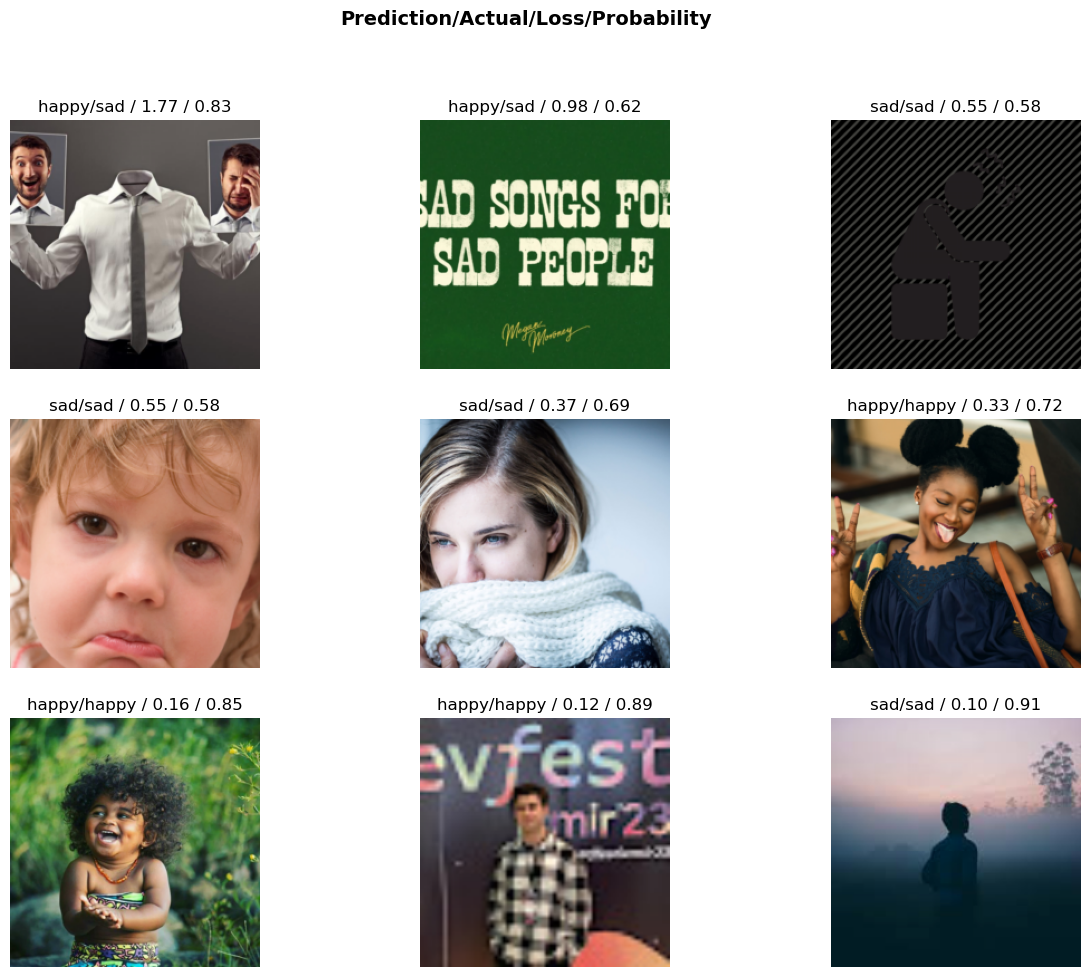

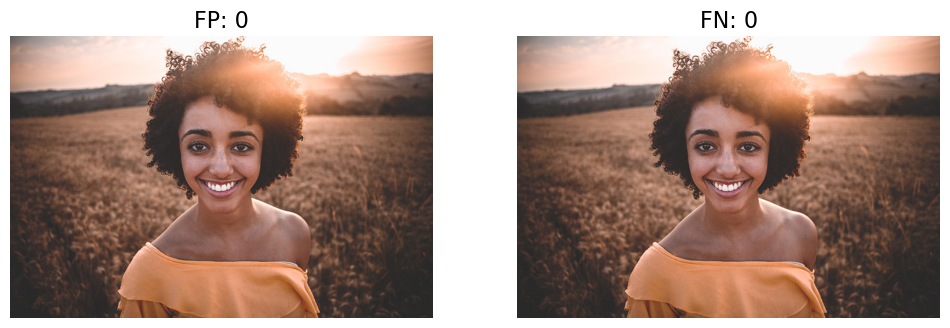

In [72]:
from PIL import Image
import numpy as np

def load_img_id(ds, idx): 
    return np.array(Image.open(ds.items[idx]))

def rand_by_correct(is_correct): 
    return rand_by_mask((preds == data.valid_ds.items)==is_correct)

def rand_by_mask(mask): 
    idxs = np.where(mask)[0]
    return np.random.choice(idxs, min(4, len(idxs)), replace=False)

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.valid_ds, idx) for idx in idxs]
    title_probs = [f'{data.valid_ds.vocab[preds[idx].argmax()]} ({preds[idx].max():.2f})\nActual: {data.valid_ds.vocab[data.valid_ds[idx][1]]}' for idx in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])
        
# Get predictions
preds,targs = learn.get_preds()

# Find top losses
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

# True Positives (Correctly classified as Happy)
tp_idxs = rand_by_correct(True)

# False Positives (Incorrectly classified as Happy)
fp_idxs = rand_by_correct(False)

# True Negatives (Correctly classified as Sad)
tn_idxs = rand_by_correct(True)

# False Negatives (Incorrectly classified as Sad)
fn_idxs = rand_by_correct(False)

# Selected indices for plotting
selected_idxs = np.concatenate([tp_idxs[:4], fp_idxs[:4], tn_idxs[:4], fn_idxs[:4]])

# Plot selected samples
imgs = [load_img_id(data.valid_ds, idx) for idx in selected_idxs]
titles = [f'TP: {i}' for i in tp_idxs[:4]] + [f'FP: {i}' for i in fp_idxs[:4]] + [f'TN: {i}' for i in tn_idxs[:4]] + [f'FN: {i}' for i in fn_idxs[:4]]

plots(imgs, titles=titles, figsize=(12, 12))

